<a href="https://colab.research.google.com/github/Aryasreeg/Aryasreeg/blob/main/MLE_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood Estimation

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# create an independent variable 
x = np.linspace(-10, 30, 100)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = 10 + 4*x + e

df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-11.643460
1,-9.595960,-16.451084
2,-9.191919,-23.062202
3,-8.787879,-22.075451
4,-8.383838,-12.791892


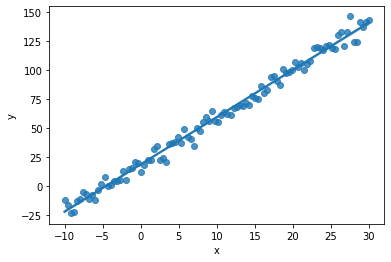

In [3]:
# visualize data distribution
sns.regplot(x='x', y='y', data = df)
plt.show()

## Solve by OLS approach

In [4]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8999.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           3.10e-98
Time:                        10:39:34   Log-Likelihood:                -301.73
No. Observations:                 100   AIC:                             607.5
Df Residuals:                      98   BIC:                             612.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7724      0.658     28.529      0.000      17.467      20.078
x              4.0630      0.043     94.863      0.000       3.978       4.148
==============================================================================
Omnibus:                        0.274   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.091
Skew:                           0.070   Prob(JB):                        0.955
Kurtosis:                       3.049   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# find the std dev
res = model.resid
standard_dev = np.std(res)
standard_dev

4.945057208367173

## Solve by MLE approach

In [6]:
# MLE

def MLE_Norm(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*x

  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL

In [7]:
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

      fun: 301.7327067148958
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.25277607e-05,  7.67386155e-04, -3.41060513e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 136
      nit: 26
   status: 0
  success: True
        x: array([18.77245284,  4.06297601,  4.94505387])